# Explore here

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

### Paso 3: Variables de entorno

Ya tienes el archivo .env en la raíz del proyecto. Asegúrate de que contenga las siguientes variables con tus credenciales de Spotify (reemplaza el contenido con tus propios datos):

CLIENT_ID=your_client_id
CLIENT_SECRET=your_client_secret
⚠️ Es importante que coloques tus datos en las variables de entorno para evitar exponer tus credenciales si subes el proyecto a un repositorio.

In [14]:
# Spotify API credentials
# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

# load the .env file variables
load_dotenv()

True

### Paso 4: Inicializar la biblioteca Spotipy
Importar Spotipy.
Realizar la conexión con la API. Para ello, puedes utilizar la función spotipy.Spotify().

In [15]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

### Paso 5: Realizar solicitudes a la API

Comienza a interactuar con la API de Spotify: Obtén de tu artista favorito, el top 10 de sus canciones. Para ello, tendrás que buscar el ID del artista para usarlo en la librería. Este identificador es la dirección web que tiene el artista en Spotify:
Buscar el identificador del artista en Spotify

Una vez tengas la respuesta de la API, quédate con el elemento tracks, que contendrá las canciones con más reproducciones del artista, quédate con el nombre de la canción, la popularidad y la duración (en minutos).

In [16]:
artist_id = "5LfGQac0EIXyAN8aUwmNAQ"

results = spotify.artist_top_tracks(artist_id)

canciones = []
for pista in results['tracks'][:10]:
    canciones.append({
        'nombre':pista['name'],
        'popularidad': pista['popularity'],
        'duración': round(pista['duration_ms'] / 1000 / 60, 2)
    })
canciones


[{'nombre': "The Kids Aren't Alright", 'popularidad': 82, 'duración': 3.0},
 {'nombre': "You're Gonna Go Far, Kid", 'popularidad': 81, 'duración': 2.96},
 {'nombre': 'Pretty Fly (For A White Guy)',
  'popularidad': 78,
  'duración': 3.14},
 {'nombre': 'Self Esteem', 'popularidad': 78, 'duración': 4.3},
 {'nombre': "Why Don't You Get A Job", 'popularidad': 75, 'duración': 2.87},
 {'nombre': 'Come Out and Play', 'popularidad': 73, 'duración': 3.3},
 {'nombre': 'Want You Bad', 'popularidad': 73, 'duración': 3.38},
 {'nombre': 'Gone Away - 1997', 'popularidad': 70, 'duración': 4.48},
 {'nombre': 'Hit That', 'popularidad': 67, 'duración': 2.82},
 {'nombre': 'Original Prankster', 'popularidad': 66, 'duración': 3.68}]

### Paso 6: Transformar a Pandas DataFrame

Puesto que el resultado obtenido en estos pasos es susceptible de tener formato de tabla, conviértelo en un DataFrame importando los datos en su formato de diccionario. A continuación, ordena las canciones por popularidad creciente y muestra el top 3 resultante.

In [17]:
df = pd.DataFrame(canciones)
top_three = df.sort_values(by='popularidad', ascending = False).head(3)
display(top_three)
display(df)

,nombre,popularidad,duración
0,The Kids Aren't Alright,82,3.00
1,"You're Gonna Go Far, Kid",81,2.96
2,Pretty Fly (For A White Guy),78,3.14


,nombre,popularidad,duración
0,The Kids Aren't Alright,82,3.00
1,"You're Gonna Go Far, Kid",81,2.96
2,Pretty Fly (For A White Guy),78,3.14
3,Self Esteem,78,4.30
4,Why Don't You Get A Job,75,2.87
5,Come Out and Play,73,3.30
6,Want You Bad,73,3.38
7,Gone Away - 1997,70,4.48
8,Hit That,67,2.82
9,Original Prankster,66,3.68


### Paso 7: Analizar relación estadística

¿Tiene relación la duración con la popularidad? ¿Podríamos decir que una canción que dure poco tiempo puede ser más popular que otra que dure más? Analízalo graficando un scatter plot y argumenta tu respuesta.

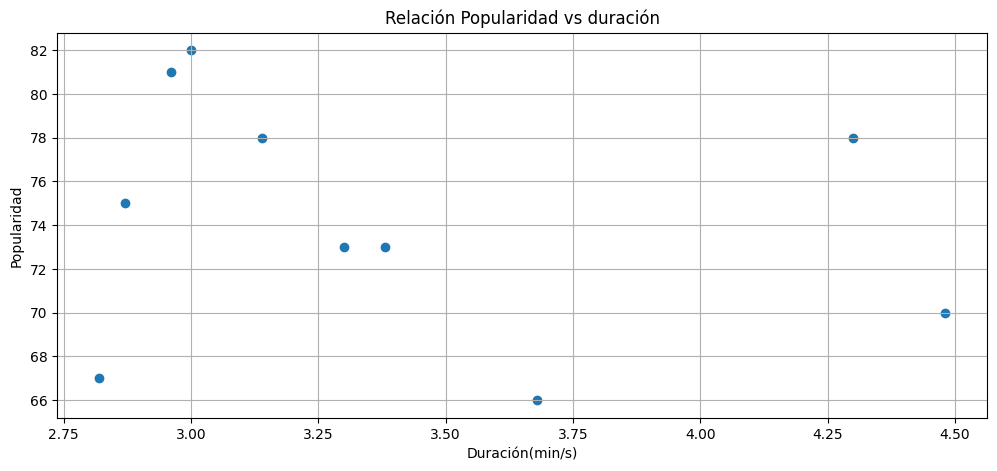

In [18]:
plt.figure(figsize=(12,5))
plt.scatter(df['duración'], df['popularidad'])
plt.xlabel('Duración(min/s)')
plt.ylabel('Popularidad')
plt.title('Relación Popularidad vs duración')
plt.grid(True)
plt.show()

En el gráfico podemos observar que las canciones con menor duración tienden a ser más populares que las que tienen una mayor duración.